# Machine Learning Foundations
This material is adapted from the following,
- [Scikit Learn](http://scikit-learn.org/stable/)  
- [Sebastian Raschka](https://github.com/rasbt/python-machine-learning-book)  
- [Jake Vanderplas](https://github.com/jakevdp/sklearn_tutorial)
- [Andreas Mueller](http://amueller.github.io)  
- [Kyle Kastner](https://kastnerkyle.github.io/)  
- [Quantopian Research](https://github.com/quantopian/research_public)
- [Python for Probability, Statistics, and Machine Learning](http://www.springer.com/fr/book/9783319307152), [github](https://github.com/unpingco/Python-for-Probability-Statistics-and-Machine-Learning)

## Imports

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Ignore Warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

""" Include Parent Directory in Python Path """
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import numpy as np

# Basic Probability Review

## Convergence

The absence of the probability density for the raw data means that we have to argue about sequences of random variables in a structured way. From basic calculus, recall the following convergence notation,

$$
x_n \rightarrow x_o
$$

for the real number sequence $x_n$. This means that for any given $\epsilon>0$, no matter how small, we can find a sample size $m$ such that for any $n>m$, we have

$$
\vert x_n-x_o \vert < \epsilon
$$

Intuitively, this means that once we get past $m$ values in the sequence, we get as to within $\epsilon$ of $x_o$. There are two moving parts for random variables. Recall that random variables are functions that map sets onto the real line: $X:\Omega \mapsto \mathbb{R}$. Thus, when discussing convergence, we are concerned with the behavior of subsets in $\Omega$ while arguing about convergence and the sequence of values that random variables take on the real line.

## Almost Sure Convergence

The most straightforward extension into statistics of this convergence concept is *convergence with probability one*,

$$
P\lbrace \texttt{for each } \epsilon>0 \texttt{ there is } n_\epsilon>0 \texttt{ such that for all } n>n_\epsilon, \: \vert X_n-X \vert < \epsilon   \rbrace = 1
$$

which is known as *almost sure convergence*, $X_n \overset{as}{\to} X$. Note the similarity to the prior notion of convergence for real numbers. In this context, almost sure convergence means that if we take any particular $\omega\in\Omega$ and look at the sequence of real numbers produced by each of the random variables,

$$
(X_1(\omega),X_2(\omega),X_3(\omega),\ldots,X_n(\omega))
$$

then this sequence is just a real-valued sequence in the sense of our convergence on the real line and converges in the same way. If we collect all of the $\omega$ for which this is true and the measure of that collection equals one, then we have almost sure convergence of the random variable. Notice how the convergence idea applies to both sides of the random variable: the domain side ($\Omega$) and the co-domain real-valued side ($\mathbb{R}$).

The following is an equivalent, and more compact, way of writing this,

$$
P\left(\omega\in\Omega \colon\lim_{n\rightarrow\infty} X_n(\omega)=X(\omega) \right)=1
$$

## Example
Consider the following sequence of uniformly distributed random variables on the unit interval, $X_n \sim \mathcal{U}[0,1]$. Now, consider the maximum over the set of $n$ such variables as the following,

$$
X_{(n)} = \max \lbrace X_1,\ldots,X_n \rbrace
$$

In other words, we scan through a list of $n$ uniformly distributed random variables and pick out the maximum over the set. Intuitively, we should expect that $X_{(n)}$ should somehow converge to one. Let's see if we can make this happen almost surely. We want to find $m$ such that the following is true,

$$
P(\vert 1 - X_{(n)} \vert) < \epsilon \texttt{ when } n>m
$$

Given $X_{(n)}<1$, we can simplify this as the following,
 
$$
1-P(X_{(n)}<\epsilon)=1-(1-\epsilon)^m \underset{m\rightarrow\infty}{\longrightarrow} 1
$$

 Thus, this sequence converges almost surely. We can work this
example out in Python using Scipy to make it concrete with the following
code,

In [6]:
from scipy import stats
u=stats.uniform()
xn = lambda i: u.rvs(i).max()
xn(5)

0.89450314522086127

Thus, the `xn` variable is the same as the $X_{(n)}$ random variable in our example. The following fiture shows a plot of these random variables for different values of $n$ and multiple realizations of each random variable (multiple gray lines).

<img src="http://ml4ef.github.io/images/Convergence_001.png" width=500>

The dark horizontal line is at the `0.95` level. For this example, suppose we are interested in the convergence of the random variable to within `0.05` of `1.0` so we are interested in the region between `1.0` and `0.95`. Thus, $\epsilon=0.05$ and we have to find $n_\epsilon$ to get the almost sure convergence. As we notice from the previous figure, as soon as we get past $n>60$, we can see that all the realizations start to fit in the region above the `0.95` horizontal line.  However, there are still some cases where a particular realization will skip below this line. To get the probability  guarantee of the definition satisfied, we have to make sure that for whatever $n_\epsilon$ we settle on, the probability of this kind of noncompliant behavior should be extremely small, say, less than 1%.  Now, we can compute the following to estimate this probability for $n=60$ over 1000 realizations,

In [7]:
import numpy as np
np.mean([xn(60) > 0.95 for i in range(1000)])

0.96199999999999997

 So, the probability of having a noncompliant case beyond $n>60$ is
pretty good, but not still what we are after (`0.99`). We can solve for the $m$
in our analytic proof of convergence by plugging in our factors for $\epsilon$
and our desired probability constraint,

In [8]:
print(np.log(1-.99)/np.log(.95))

89.7811349607


 Now, rounding this up and re-visiting the same estimate as above,

In [9]:
import numpy as np
np.mean([xn(90) > 0.95 for i in range(1000)])

0.98299999999999998

which is the result we were looking for. The important thing to understand from this example is that we had to choose convergence criteria for *both* the values of the random variable (`0.95`) and for the probability of achieving that level (`0.99`) in order to compute $m$. Informally speaking, almost sure convergence means that not only will any particular $X_n$ be close to $X$ for large $n$, but whole sequence of values will remain close to $X$ with high probability. 

## Convergence in Probability

*Convergence in probability*,

$$
\mathbb{P}(\mid X_n -X\mid > \epsilon) \rightarrow 0,
$$

as $n \rightarrow \infty$ for each $\epsilon > 0$ is a weaker kind of convergence.

For example, let's consider the following sequence of random variables where $X_n = 1/2^n$ with probability $p_n$ and where $X_n=c$ with probability $1-p_n$. Then, we have $X_n  \overset{P}{\to} 0$ as $p_n \rightarrow 1$.  This is allowable under this notion of convergence because a diminishing amount of *non-converging* behavior (namely, when $X_n=c$) is possible. Note that we have said nothing about *how* $p_n \rightarrow 1$.

**Example.** To get some sense of the mechanics of this kind of convergence, let $\lbrace X_1,X_2,X_3,\ldots \rbrace$ be the indicators of the corresponding intervals,

$$
(0,1],(0,\tfrac{1}{2}],(\tfrac{1}{2},1],(0,\tfrac{1}{3}],(\tfrac{1}{3},\tfrac{2}{3}],(\tfrac{2}{3},1],\dots
$$

In other words, just keep splitting the unit interval into equal chunks and enumerate those chunks with $X_i$. Because each $X_i$ is an indicator function, it takes only two values: zero and one. For example, $X_2=1$ if $0<x \le 1/2$ and zero otherwise. Note that $x \sim \mathcal{U}(0,1)$. This means that $P(X_2=1)=1/2$. Now, we want to compute the sequence of $P(X_n>\epsilon)$ for each $n$ for some $\epsilon\in (0,1)$. For $X_1$, we  have $P(X_1>\epsilon)=1$ because we already chose $\epsilon$ in the interval covered by $X_1$. For $X_2$, we have $P(X_2>\epsilon)=1/2$, for $X_3$, we have $P(X_3>\epsilon)=1/2$, and so on. This produces the following sequence:

$$
(1,\frac{1}{2},\frac{1}{2},\frac{1}{3},\frac{1}{3},\ldots).
$$

The limit of the sequence is zero, so $X_n \overset{P}{\to} 0$. However, for every $x\in (0,1)$, the sequence of  function values of $X_n(x)$ consists of infinitely many zeros and ones (remember that indicator functions can evaluate to either zero or one). Thus, the set of $x$ for which the sequence $X_n(x)$ converges is empty because the sequence bounces between zero and one. This means that almost sure convergence fails even though we have convergence in probability. The key distinction is that convergence in probability considers the convergence of a sequence of probabilities whereas almost sure convergence is concerned about the sequence of values of the random variables over sets of events that *fill out* the underlying probability space entirely (i.e., with probability one).

This is a good example so let's see if we can make it concrete with some
Python. The following is a function to compute the different subintervals,

In [10]:
make_interval= lambda n: np.array([(i/n,j/n) for i,j in zip(range(n+1),range(1,n+1))])

 Now, we can use this function to create a Numpy
array of intervals, as in the example,

In [10]:
intervals= np.vstack([make_interval(i) for i in range(1,5)])
print(intervals)

[[ 0.          1.        ]
 [ 0.          0.5       ]
 [ 0.5         1.        ]
 [ 0.          0.33333333]
 [ 0.33333333  0.66666667]
 [ 0.66666667  1.        ]
 [ 0.          0.25      ]
 [ 0.25        0.5       ]
 [ 0.5         0.75      ]
 [ 0.75        1.        ]]


 The following function computes the bit string in our example,
$\lbrace X_1,X_2,\ldots,X_n \rbrace$,

In [11]:
bits= lambda u:((intervals[:,0] < u) & (u<=intervals[:,1])).astype(int)
bits(u.rvs())

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0])

 Now that we have the individual bit strings, to show convergence we
want to show that the probability of each entry goes to a limit. For example,
using ten realizations,

In [12]:
print (np.vstack([bits(u.rvs()) for i in range(10)]))

[[1 1 0 1 0 0 1 0 0 0]
 [1 0 1 0 0 1 0 0 0 1]
 [1 0 1 0 1 0 0 0 1 0]
 [1 1 0 1 0 0 1 0 0 0]
 [1 0 1 0 1 0 0 0 1 0]
 [1 0 1 0 1 0 0 0 1 0]
 [1 1 0 0 1 0 0 1 0 0]
 [1 1 0 1 0 0 1 0 0 0]
 [1 0 1 0 1 0 0 0 1 0]
 [1 1 0 1 0 0 1 0 0 0]]


We want the limiting probability of a one in each row to convert to a limit. We can estimate this over 1000  realizations using the following code,

In [13]:
np.vstack([bits(u.rvs()) for i in range(1000)]).mean(axis=0)

array([ 1.   ,  0.494,  0.506,  0.311,  0.346,  0.343,  0.225,  0.269,
        0.247,  0.259])

Note that these entries should approach the $(1,\frac{1}{2},\frac{1}{2},\frac{1}{3},\frac{1}{3},\ldots)$ sequence we found earlier. The following figure shows the convergence of these probabilities for a large number of intervals.

<img src="http://ml4ef.github.io/images/Convergence_002.png" width=500>

Eventually, the probability shown on this graph will decrease to zero with large enough $n$. Again, note that the individual sequences of zeros and ones do not converge, but the probabilities of these sequences converge. This is the key difference between almost sure convergence and convergence in probability. Thus, convergence in probability does *not* imply  almost sure convergence. Conversely, almost sure convergence *does* imply convergence in probability.

The following notation should help emphasize the difference between almost sure convergence and convergence in probability, respectively,

$$
\begin{align*}
P\left(\lim_{n\rightarrow \infty} \vert X_n-X\vert < \epsilon\right)&=1 \texttt{(almost sure convergence)}  \\\
\lim_{n\rightarrow \infty}  P(\vert X_n-X\vert < \epsilon)&=1 \texttt{(convergence in probability)}
\end{align*}
$$

## Convergence in Distribution

So far, we have been discussing convergence in terms of sequences of probabilities or sequences of values taken by the random variable.  By contrast,  the next major kind of convergence is *convergence in distribution*, where,

$$
\lim_{n \to \infty}  F_n(t) = F(t)
$$

 for all $t$ for which $F$ is continuous and $F$ is the
cumulative density function. For this case, convergence is only
concerned with the cumulative density function, written as $X_n
\overset{d}{\to} X$.  

**Example.** To develop some intuition about this kind of convergence,
consider a sequence of $X_n$ Bernoulli random variables. Furthermore,
suppose these are all really just the same random variable $X$.
Trivially, $X_n \overset{d}{\to} X$. Now, suppose we define $Y=1-X$,
which means that $Y$ has the same distribution as $X$. Thus, $X_n
\overset{d}{\to} Y$. By contrast, because $\vert X_n - Y\vert=1$ for all
$n$, we can never have almost sure convergence or convergence in
probability. Thus, convergence in distribution is the weakest
of the three forms of convergence in the sense that it is implied by
the other two, but implies neither of the two.

As another striking example, we could have $Y_n \overset{d}{\to} Z$ where $Z
\sim \mathcal{N}(0,1)$, but we could also have $Y_n \overset{d}{\to} -Z$.
That is, $Y_n$ could converge in distribution to either $Z$ or $-Z$. This
may seem ambiguous, but this kind of convergence is practically very useful
because it allows for complicated distributions to be approximated by
simpler distributions.  

## Limit Theorems
<div id="ch:stats:sec:limit"></div>

Now that we have all of these notions of convergence, we can apply them to
different situations and see what kinds of claims we can construct from them.

**Weak Law of Large Numbers.**  Let $\lbrace X_1,X_2,\ldots,X_n \rbrace$ be an
iid set of random variables with finite mean $\mathbb{E}(X_k)=\mu$ and finite
variance. Let $\overline{X}_n = \frac{1}{n}\sum_k X_k$. Then, we have
$\overline{X}_n \overset{P}{\to} \mu$. This result is important because we
frequently estimate parameters using an averaging process of some kind. This
basically justifies this in terms of convergence in probability. Informally,
this means that the distribution of $\overline{X}_n$ becomes
concentrated around $\mu$ as $n\rightarrow\infty$.

**Strong Law of Large Numbers.**  Let $\lbrace X_1,X_2,\ldots,\rbrace$ be an
iid set of random variables. Suppose that $\mu=\mathbb{E}\vert
X_i\vert<\infty$, then $\overline{X}_n \overset{as}{\to} \mu$. The reason this
is called the strong law is that it implies the weak law because almost sure
convergence implies convergence in probability. The so-called  Komogorov
criterion gives the convergence of the following,

$$
\sum_k \frac{\sigma_k^2}{k^2}
$$

 as a sufficient condition for concluding that the Strong Law applies
to the sequence $ \lbrace X_k \rbrace$ with corresponding $\lbrace \sigma_k^2
\rbrace$.

As an example, consider an infinite sequence of Bernoulli trials with $X_i=1$
if the $i^{th}$ trial is successful. Then $\overline{X}_n$ is the relative
frequency of successes in $n$ trials and $\mathbb{E}(X_i)$ is the
probability $p$ of success on the $i^{th}$ trial. With all that established,
the Weak Law says only that if we consider a sufficiently large and fixed
$n$, the probability that the relative frequency will converge to $p$ is
guaranteed. The Strong Law states that if we regard the observation of all
the infinite $\lbrace X_i \rbrace$ as one performance of the experiment, the
relative frequency of successes will almost surely converge to $p$.  The
difference between the Strong Law and the Weak Law of large numbers is
subtle and rarely arises in practical applications of probability theory.

**Central Limit Theorem.**  Although the Weak Law of Large Numbers tells us
that the distribution of $\overline{X}_n$ becomes concentrated around $\mu$, it
does not tell us what that distribution is. The Central Limit Theorem (CLT)
says that $\overline{X}_n$ has a distribution that is approximately Normal
with mean $\mu$ and variance $\sigma^2/n$. Amazingly, nothing is assumed
about the distribution of $X_i$, except the existence
of the mean and variance. The following is the Central Limit Theorem:
Let $\lbrace X_1,X_2,\ldots,X_n \rbrace$ be iid with mean $\mu$ and
variance $\sigma^2$. Then,

$$
Z_n = \frac{\sqrt{n}(\overline{X}_n-\mu)}{\sigma} \overset{P}{\longrightarrow} Z\sim\mathcal{N}(0,1)
$$

 The loose interpretation of the Central Limit Theorem is that
$\overline{X}_n$ can be legitimately approximated by a Normal distribution.
Because we are talking about convergence in probability here, claims
about probability are legitimized, not claims about the random variable
itself. Intuitively, this shows that normality arises from sums of small,
independent disturbances of finite variance. Technically, the finite
variance assumption is essential for normality. Although the Central Limit
Theorem provides a powerful, general approximation, the quality of the
approximation for a particular situation still depends on the original
(usually unknown) distribution.

# Useful Inequalities

In practice, few quantities can be analytically calculated. Some knowledge
of bounding inequalities helps find the ballpark for potential solutions. This
sections discusses three key inequalities that are important for 
probability, statistics, and machine learning.

## Markov's Inequality

Let $X$ be a non-negative random variable
and suppose that $\mathbb{E}(X) < \infty$. Then,
for any $t>0$,

In [14]:
from pprint import pprint
import textwrap
import sys, re

$$
\mathbb{P}(X>t)\leq \frac{\mathbb{E}(X)}{t}
$$

 This is a foundational inequality that is
used as a stepping stone to other inequalities. It is easy
to prove. Because $X>0$, we have the following,

$$
\begin{align*}
\mathbb{E}(X)&=\int_0^\infty x f_x(x)dx =\underbrace{\int_0^t x f_x(x)dx}_{\text{omit this}}+\int_t^\infty x f_x(x)dx \\\ 
             &\ge\int_t^\infty x f_x(x)dx \ge t\int_t^\infty x f_x(x)dx = t \mathbb{P}(X>t)
\end{align*}
$$

 The step that establishes the inequality is the part where the
$\int_0^t x f_x(x)dx$ is omitted.  For a particular $f_x(x)$ that my be
concentrated around the $[0,t]$ interval, this could be a lot to throw out.
For that reason, the Markov Inequality is considered a *loose* inequality,
meaning that there is a substantial gap between both sides of the inequality.
For example, as shown in [Figure](#fig:ProbabilityInequalities_001), the
$\chi^2$ distribution has a lot of its mass on the left, which would be omitted
in the  Markov Inequality. [Figure](#fig:ProbabilityInequalities_002) shows
the two curves established by the Markov Inequality. The gray shaded region is
the gap between the two terms and indicates that looseness of the bound
(fatter shaded region) for this case.

<!-- dom:FIGURE: [images/ProbabilityInequalities_001.png, width=500 frac=0.75] The $\chi_1^2$ density has much of its weight on the left, which is excluded in the establishment of the Markov Inequality. <div id="fig:ProbabilityInequalities_001"></div> -->
<!-- begin figure -->
<div id="fig:ProbabilityInequalities_001"></div>

<p>The $\chi_1^2$ density has much of its weight on the left, which is excluded in the establishment of the Markov Inequality.</p>
<img src="http://ml4ef.github.io/images/ProbabilityInequalities_001.png" width=500>

<!-- end figure -->


<!-- dom:FIGURE: [fig-probability/ProbabilityInequalities_002.png, width=500 frac=0.75] The shaded area shows the region between the curves on either side of the Markov Inequality.  <div id="fig:ProbabilityInequalities_002"></div> -->
<!-- begin figure -->
<div id="fig:ProbabilityInequalities_002"></div>

<p>The shaded area shows the region between the curves on either side of the Markov Inequality.</p>
<img src="http://ml4ef.github.io/images/ProbabilityInequalities_002.png" width=500>

<!-- end figure -->


## Chebyshev's Inequality

Chebyshev's Inequality drops out directly from the Markov Inequality.  Let
$\mu=\mathbb{E}(X)$ and $\sigma^2=\mathbb{V}(X)$. Then, we have

$$
\mathbb{P}(\vert X-\mu\vert \ge t) \le \frac{\sigma^2}{t^2}
$$

 Note that if we normalize so that $Z=(X-\mu)/\sigma$, we
have $\mathbb{P}(\vert Z\vert \ge k) \le 1/k^2$. In particular,
$\mathbb{P}(\vert Z\vert \ge 2) \le 1/4$. We can illustrate this
inequality using Sympy statistics module,



In [15]:
import sympy
import sympy.stats as ss
t=sympy.symbols('t',real=True)
x=ss.ChiSquared('x',1)

  To get the left side of the Chebyshev inequality, we
have to write this out as the following conditional probability,

In [16]:
r = ss.P((x-1) > t,x>1)+ss.P(-(x-1) > t,x<1)

 This is because of certain limitations in the statistics module at
this point in its development regarding the absolute value function. We could
take the above expression, which is a function of $t$ and attempt to compute
the integral, but that would take a very long time (the expression is very long
and complicated, which is why we did not print it out above). This is because
Sympy is a pure-python module that does not utilize any C-level optimizations
under the hood.  In this situation, it's better to use the built-in cumulative
density function as in the following (after some rearrangement of the terms),

In [17]:
w=(1-ss.cdf(x)(t+1))+ss.cdf(x)(1-t)

 To plot this, we can evaluated at a variety of `t` values by using
the `.subs` substitution method, but it is more convenient to use the
`lambdify` method to convert the expression to a function.

In [18]:
fw=sympy.lambdify(t,w)

 Then, we can evaluate this function using something like

In [19]:
map(fw,[0,1,2,3,4])

to produce the following figure,

<img src="http://ml4ef.github.io/images/ProbabilityInequalities_003.png" width=500>

## Hoeffding's Inequality
<div id="ch:prob:sec:ineq"></div>

Hoeffding's Inequality is similar, but less loose, than Markov's Inequality. Let $X_1,\ldots,X_n$ be iid observations such that $\mathbb{E}(X_i)=\mu$ and $a\le X_i \le b$. Then, for any $\epsilon>0$, we have

$$
\mathbb{P}(\vert \overline{X}_n -\mu\vert \ge \epsilon) \le 2 \exp(-2 n\epsilon^2/(b-a)^2)
$$

where $\overline{X}_n = \tfrac{1}{n}\sum_i^n X_i$. Note that we further assume that the individual random variables are bounded.

**Corollary.** If $X_1,\ldots,X_n$ are independent with $\mathbb{P}(a\le X_i\le b)=1$ and all with $\mathbb{E}(X_i)=\mu$. Then, we have

$$
\vert\overline{X}_n-\mu\vert \le \sqrt{\frac{c}{2 n}\log \frac{2}{\delta}}
$$

where $c=(b-a)^2$. We will see this inequality again in the machine learning chapter. The following figure shows the Markov and Hoeffding bounds for the case of ten identically and uniformly distributed random variables, $X_i \sim \mathcal{U}[0,1]$. 

<img src="http://ml4ef.github.io/images/ProbabilityInequalities_004.png" width=500>

The solid line shows $\mathbb{P}(\vert \overline{X}_n - 1/2 \vert > \epsilon)$.  Note that the Hoeffding Inequality is tighter than the Markov Inequality and that both of them merge when $\epsilon$ gets big enough.

# What is Machine Learning?

[A Visual Introduction to Machine Learning](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)

In this section we will begin to explore the basic principles of machine learning. Machine Learning is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve their behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial Intelligence** since those algorithms can be seen as building blocks to make computers learn to behave more
intelligently by somehow **generalizing** rather that just storing and retrieving data items like a database system would do.

## Scikit-Learn
Every algorithm in scikit-learn is an ''Estimator'' object. For instance a linear regression is implemented as so:

In [37]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

In [38]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [39]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


**Estimated Model parameters**: When data is *fit* with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


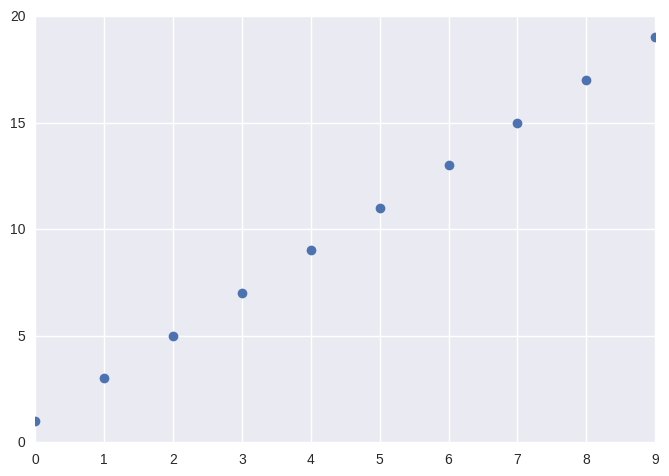

In [40]:
x = np.arange(10)
y = 2 * x + 1

print(x)
print(y)

plt.plot(x, y, 'o');

In [41]:
# The input data for sklearn is 2D: (samples == 3 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [42]:
# fit the model on our data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [45]:
# underscore at the end indicates a fit parameter
print(model.coef_)
print(model.intercept_)

[ 2.]
1.0


The model found a line with a slope 2 and intercept 1, as we'd expect.

Now let's explore two very simple machine learning tasks. The first is a **classification** task: the figure shows a collection of two-dimensional data, colored according to two different class labels. A classification algorithm may be used to draw a dividing boundary between the two clusters of points:

In [20]:
# Start pylab inline mode, so figures will appear in the notebook
%matplotlib inline

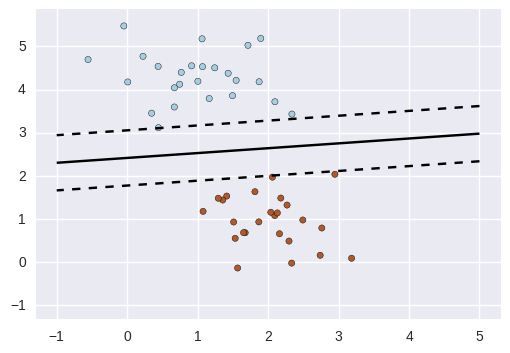

In [21]:
# Import the example plot from the figures directory
from images import plot_sgd_separator
plot_sgd_separator()

This may seem like a trivial task, but it is a simple version of a very important concept. By drawing this separating line, we have learned a model which can **generalize** to new data: if you were to drop another point onto the plane which is unlabeled, this algorithm could now **predict** whether it's a blue or a red point.

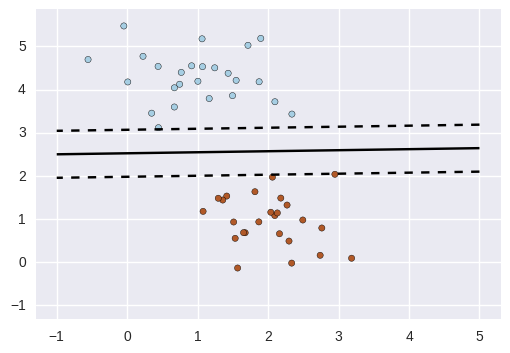

In [22]:
# %load figures/sgd_separator.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs


def plot_sgd_separator():
    # we create 50 separable points
    X, Y = make_blobs(n_samples=50, centers=2,
                      random_state=0, cluster_std=0.60)

    # fit the model
    clf = SGDClassifier(loss="hinge", alpha=0.01,
                        n_iter=200, fit_intercept=True)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    xx = np.linspace(-1, 5, 10)
    yy = np.linspace(-1, 5, 10)

    X1, X2 = np.meshgrid(xx, yy)
    Z = np.empty(X1.shape)
    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        p = clf.decision_function([[x1, x2]])
        Z[i, j] = p[0]
    levels = [-1.0, 0.0, 1.0]
    linestyles = ['dashed', 'solid', 'dashed']
    colors = 'k'

    ax = plt.axes()
    ax.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

    ax.axis('tight')


if __name__ == '__main__':
    plot_sgd_separator()
    plt.show()

The next simple task we'll look at is a **regression** task: a simple best-fit line
to a set of data:

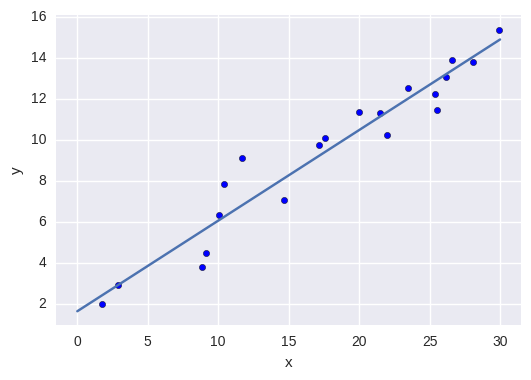

In [23]:
from images import plot_linear_regression
plot_linear_regression()

Again, this is an example of fitting a model to data, such that the model can make
generalizations about new data.  The model has been **learned** from the training
data, and can be used to predict the result of test data:
here, we might be given an x-value, and the model would
allow us to predict the y value.  Again, this might seem like a trivial problem,
but it is a basic example of a type of operation that is fundamental to
machine learning tasks.

# A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the
iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.
There are three species of iris in the dataset, which we can picture here:

<h1><center>"Iris Setosa"</center></h1>
<img src="http://ml4ef.github.io/images/iris_setosa.jpg" width=500>

<h1><center>"Iris Versicolor"</center></h1>
<img src="http://ml4ef.github.io/images/iris_versicolor.jpg" width=500>

<h1><center>"Iris Virginica"</center></h1>
<img src="http://ml4ef.github.io/images/iris_virginica.jpg" width=500>

### Quick Question:

**If we want to design an algorithm to recognize iris species, what might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()

In [30]:
iris.keys()

dict_keys(['feature_names', 'DESCR', 'target_names', 'target', 'data'])

In [31]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.data[0])

(150, 4)
[ 5.1  3.5  1.4  0.2]


In [32]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [33]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [34]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot:

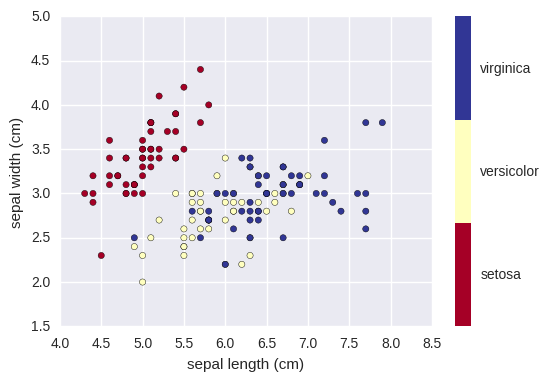

In [35]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

# Supervised Learning: Classification and Regression

In **Supervised Learning**, we have a dataset consisting of both features and labels.
The task is to construct an estimator which is able to predict the label of an object
given the set of features. A relatively simple example is predicting the species of 
iris given a set of measurements of its flower. This is a relatively simple task. 
Some more complicated examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like
  (So-called *recommender systems*: a famous example is the [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_prize)).

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from other
observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**.
In classification, the label is discrete, while in regression, the label is continuous. For example,
in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a
classification problem: the label is from three distinct categories. On the other hand, we might
wish to estimate the age of an object based on such observations: this would be a regression problem,
because the label (age) is a continuous quantity.

### Supervised Learning: Classification and regression

In **Supervised Learning**, we have a dataset consisting of both input features and a desired output, such as in the spam / no-spam example.
The task is to construct a model (or program) which is able to predict the desired output of an unseen object
given the set of features.

Some more complicated examples are:

- Given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- Given a photograph of a person, identify the person in the photo.
- Given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like.
- Given a persons age, education and position, infer their salary

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from other
observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**:

- **In classification, the label is discrete**, such as "spam" or "no spam". In other words, it provides a clear-cut distinction between categories. Furthermore, it is important to note that class labels are nominal, not ordinal variables. Nominal and ordinal variables are both subcategories of categorical variable. Ordinal variables imply an order, for example, T-shirt sizes "XL > L > M > S". On the contrary, nominal variables don't imply an order, for example, we (usually) can't assume "orange > blue > green".


- **In regression, the label is continuous**, that is a float output. For example,
in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a
classification problem: the label is from three distinct categories. On the other hand, we might
wish to estimate the age of an object based on such observations: this would be a regression problem,
because the label (age) is a continuous quantity.

In supervised learning, there is always a distinction between a **training set** for which the desired outcome is given, and a **test set** for which the desired outcome needs to be inferred. The learning model fits the predictive model to the training set, and we use the test set to evaluate its generalization performance.


### Classification Example
K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

Let's try it out on our iris classification problem:

In [47]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


You can also do probabilistic predictions:

In [48]:
knn.predict_proba([[3, 5, 4, 2],])

array([[ 0. ,  0.8,  0.2]])

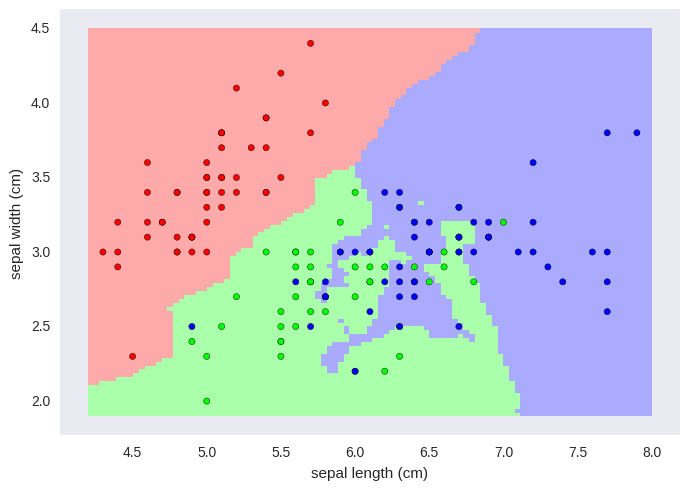

In [49]:
from fig_code import plot_iris_knn
plot_iris_knn()

### Regression Example

One of the simplest regression problems is fitting a line to data, which we saw above.
Scikit-learn also contains more sophisticated regression algorithms

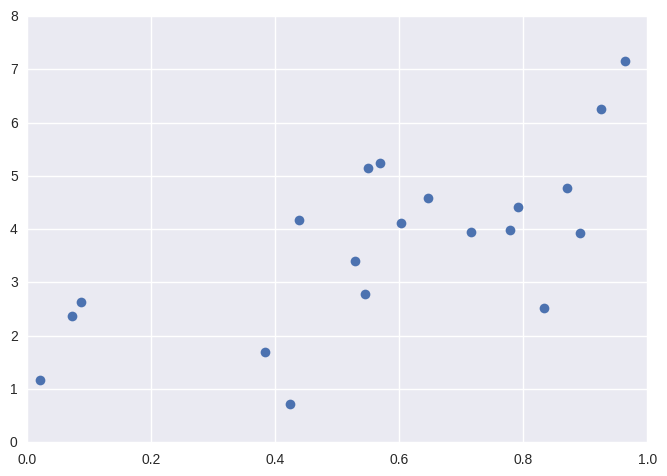

In [50]:
# Create some simple data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

Find the best fit line with Linear Regression, a very standard method from statistics:

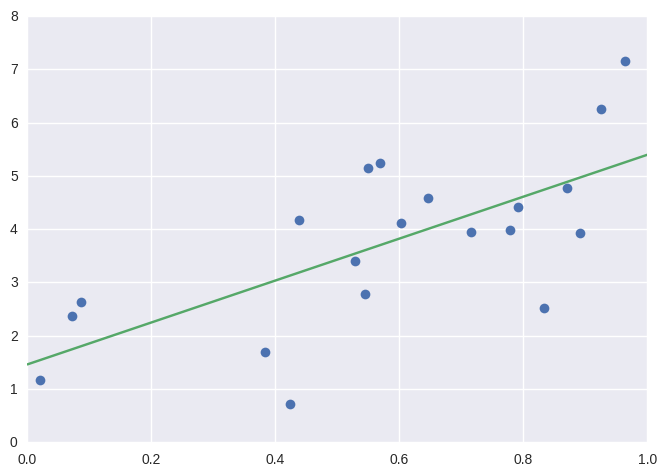

In [51]:
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

Now try a nonlinear machine learning model:

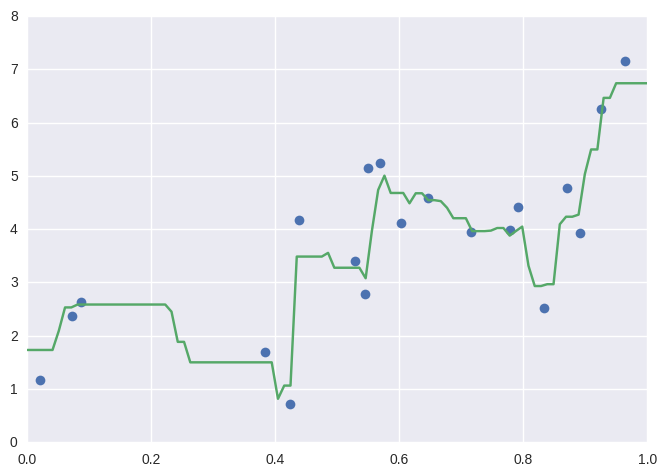

In [52]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

# Classification with Support Vector Machines

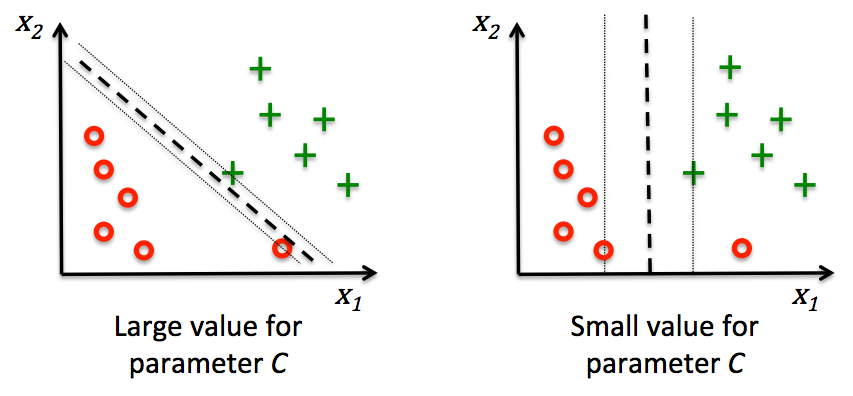

In [54]:
Image(filename='../images/03_08.png', width=600) 

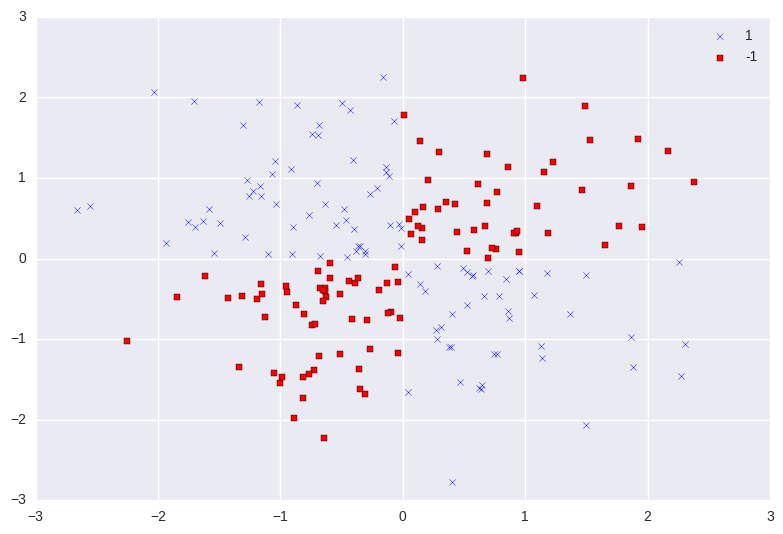

In [55]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()

<img src="http://ml4ef.github.io/images/03_11.png" width=800>

## Exercise
- Download [this](http://scikit-learn.org/stable/_downloads/svm_gui.py) file.
- Go to the directory where you downloaded the file using your terminal.
- Run the file using Python, python svm_gui.py
- Left click to place white dots
- Right click to place black dots

# Understanding Minimax through Tic-Tak-Toe
- Go to [this](http://neverstopbuilding.com/minimax) link.
- Try and consistently beat the Tic-Tak-Toe AI [here](http://perfecttictactoe.herokuapp.com/).

## Answer the following questions:

# How to Choose your Machine Learning Model

As you are submitting a solution to Kaggle, it is a good idea to "stand on the shoulder" of those who have succeeded before you. You can find previous winning solutions [HERE](http://www.chioka.in/kaggle-competition-solutions/). I suggest you review them when designing your submission.

Further, the following flow chart gives a nice summary of algorithms available through scikit-learn.

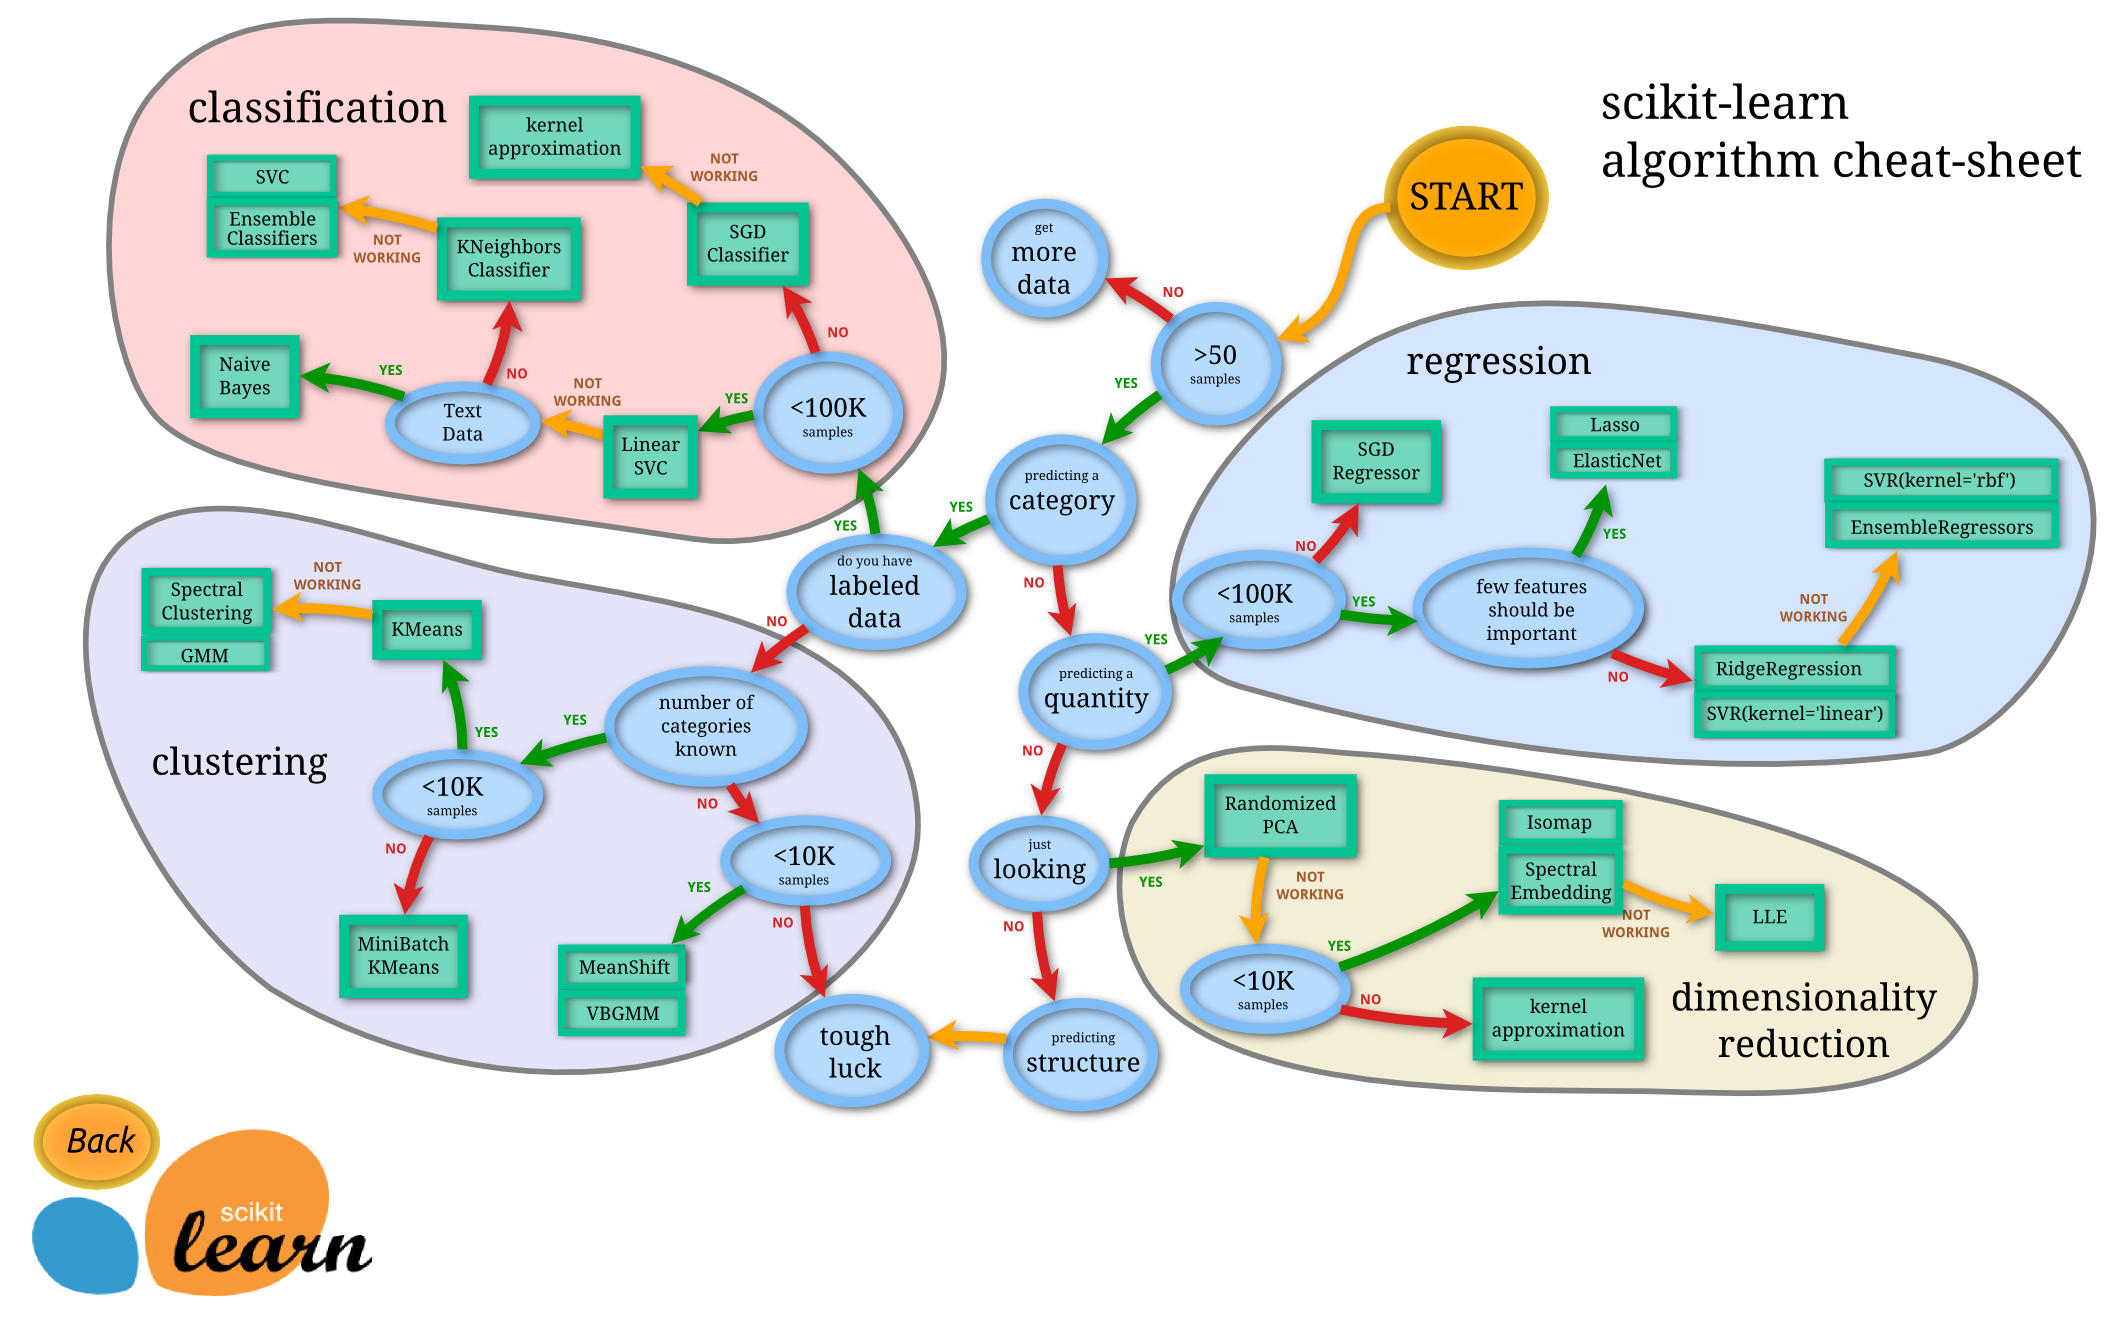

In [53]:
from IPython.display import Image
Image("http://scikit-learn.org/dev/_static/ml_map.png")